# Analyze audio_features of songs of an album using the Spotify Web API

In [127]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# read creditals (Client ID and Client Secret) from file
creditals = []
f = open('creditals.txt', 'r')
for line in f:
	#add line to creditals list (remove trailing whitespace characters)
	creditals.append(line.rstrip())

# create Spotify object with creditals
client_credentials_manager = SpotifyClientCredentials(creditals[0], creditals[1])
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

name = 'Radiohead'
#name = 'Interpol'
#name = 'The National'
results = sp.search(q='artist:' + name, type='artist')
print results


{u'artists': {u'items': [{u'genres': [u'alternative rock', u'indie rock', u'melancholia', u'modern rock', u'permanent wave', u'rock'], u'name': u'Radiohead', u'external_urls': {u'spotify': u'https://open.spotify.com/artist/4Z8W4fKeB5YxbusRsdQVPb'}, u'popularity': 81, u'uri': u'spotify:artist:4Z8W4fKeB5YxbusRsdQVPb', u'href': u'https://api.spotify.com/v1/artists/4Z8W4fKeB5YxbusRsdQVPb', u'followers': {u'total': 2348993, u'href': None}, u'images': [{u'url': u'https://i.scdn.co/image/afcd616e1ef2d2786f47b3b4a8a6aeea24a72adc', u'width': 640, u'height': 640}, {u'url': u'https://i.scdn.co/image/563754af10b3d9f9f62a3458e699f58c4a02870f', u'width': 320, u'height': 320}, {u'url': u'https://i.scdn.co/image/4067ea225d8b42fa6951857d3af27dd07d60f3c6', u'width': 160, u'height': 160}], u'type': u'artist', u'id': u'4Z8W4fKeB5YxbusRsdQVPb'}, {u'genres': [], u'name': u'Radiohead Tribute Band', u'external_urls': {u'spotify': u'https://open.spotify.com/artist/0ADkBHZhR2cVfANgK5gHQO'}, u'popularity': 13, u

In [2]:
radioheadID = '4Z8W4fKeB5YxbusRsdQVPb'
artist = sp.artist(radioheadID)
print artist

{u'genres': [u'alternative rock', u'indie rock', u'melancholia', u'modern rock', u'permanent wave', u'rock'], u'name': u'Radiohead', u'external_urls': {u'spotify': u'https://open.spotify.com/artist/4Z8W4fKeB5YxbusRsdQVPb'}, u'popularity': 81, u'uri': u'spotify:artist:4Z8W4fKeB5YxbusRsdQVPb', u'href': u'https://api.spotify.com/v1/artists/4Z8W4fKeB5YxbusRsdQVPb', u'followers': {u'total': 2348758, u'href': None}, u'images': [{u'url': u'https://i.scdn.co/image/afcd616e1ef2d2786f47b3b4a8a6aeea24a72adc', u'width': 640, u'height': 640}, {u'url': u'https://i.scdn.co/image/563754af10b3d9f9f62a3458e699f58c4a02870f', u'width': 320, u'height': 320}, {u'url': u'https://i.scdn.co/image/4067ea225d8b42fa6951857d3af27dd07d60f3c6', u'width': 160, u'height': 160}], u'type': u'artist', u'id': u'4Z8W4fKeB5YxbusRsdQVPb'}


In [3]:
radioheadTopTracks = sp.artist_top_tracks(radioheadID)
#print radioheadTopTracks
for track in radioheadTopTracks['tracks'][:10]:
    print track['name'] + ' \t' + str(track['popularity']) + ' \t' + track['id']

Creep 	80 	6b2oQwSGFkzsMtQruIWm2p
Karma Police 	73 	3SVAN3BRByDmHOhKyIDxfC
No Surprises 	71 	1bSpwPhAxZwlR2enJJsv7U
High And Dry 	71 	5jafMI8FLibnjkYTZ33m0c
Fake Plastic Trees 	70 	045sp2JToyTaaKyXkGejPy
Paranoid Android 	67 	2nTsKOXIVGDf2iPeVQO2Gm
Man of War 	65 	552BIJ9kKwwqiGf4YojYbL
Daydreaming 	65 	1uRxyAup7OYrlh2SHJb80N
Burn the Witch 	64 	3pcCifdPTc2BbqmWpEhtUd
Everything In Its Right Place 	64 	5AiNZnMDCWwujIENPj9PV9


In [4]:
# audio_analysis: many data values for a single track!
#for track in radioheadTopTracks['tracks'][:1]:
#    print sp.audio_analysis(track['id']) 
                                

In [5]:
for track in radioheadTopTracks['tracks'][:1]:
    #get audio features for a single track
    print sp.audio_features(tracks=[track['id']])

[{u'track_href': u'https://api.spotify.com/v1/tracks/6b2oQwSGFkzsMtQruIWm2p', u'analysis_url': u'https://api.spotify.com/v1/audio-analysis/6b2oQwSGFkzsMtQruIWm2p', u'energy': 0.43, u'liveness': 0.129, u'tempo': 91.841, u'speechiness': 0.0369, u'uri': u'spotify:track:6b2oQwSGFkzsMtQruIWm2p', u'acousticness': 0.0102, u'instrumentalness': 0.000141, u'time_signature': 4, u'danceability': 0.515, u'key': 7, u'duration_ms': 238640, u'loudness': -9.935, u'valence': 0.096, u'type': u'audio_features', u'id': u'6b2oQwSGFkzsMtQruIWm2p', u'mode': 1}]


In [6]:
radioheadTopTracksIDs = []
for track in radioheadTopTracks['tracks'][:10]:
    radioheadTopTracksIDs.append(track['id'])
radioHeadTopTracksAudioFeatures = sp.audio_features(tracks=radioheadTopTracksIDs)
print radioHeadTopTracksAudioFeatures

[{u'track_href': u'https://api.spotify.com/v1/tracks/6b2oQwSGFkzsMtQruIWm2p', u'analysis_url': u'https://api.spotify.com/v1/audio-analysis/6b2oQwSGFkzsMtQruIWm2p', u'energy': 0.43, u'liveness': 0.129, u'tempo': 91.841, u'speechiness': 0.0369, u'uri': u'spotify:track:6b2oQwSGFkzsMtQruIWm2p', u'acousticness': 0.0102, u'instrumentalness': 0.000141, u'time_signature': 4, u'danceability': 0.515, u'key': 7, u'duration_ms': 238640, u'loudness': -9.935, u'valence': 0.096, u'type': u'audio_features', u'id': u'6b2oQwSGFkzsMtQruIWm2p', u'mode': 1}, {u'track_href': u'https://api.spotify.com/v1/tracks/3SVAN3BRByDmHOhKyIDxfC', u'analysis_url': u'https://api.spotify.com/v1/audio-analysis/3SVAN3BRByDmHOhKyIDxfC', u'energy': 0.505, u'liveness': 0.172, u'tempo': 74.807, u'speechiness': 0.026, u'uri': u'spotify:track:3SVAN3BRByDmHOhKyIDxfC', u'acousticness': 0.0626, u'instrumentalness': 9.22e-05, u'time_signature': 4, u'danceability': 0.36, u'key': 7, u'duration_ms': 264067, u'loudness': -9.129, u'valenc

In [7]:
#audioFeature['id']
# track_href, analysis_url, uri, id
# energy, liveness, tempo, speechiness, acousticness, instrumentalness, dancability, loudness, valence
# time_signature, key, duration_ms, mode
x = []
y = []
for audioFeature in radioHeadTopTracksAudioFeatures:
    x.append(audioFeature['valence'])
    y.append(audioFeature['energy'])
print x
print y

[0.096, 0.311, 0.126, 0.36, 0.127, 0.202, 0.144, 0.115, 0.625, 0.0585]
[0.43, 0.505, 0.393, 0.383, 0.229, 0.849, 0.472, 0.263, 0.847, 0.462]


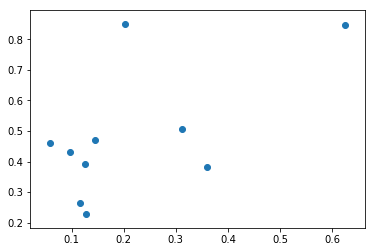

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x, y);

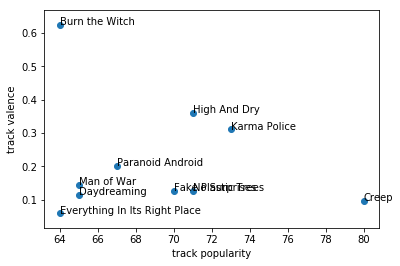

In [9]:
trackNames = []
trackNumber = []
trackPopularity = []
trackValence = []

radioheadID = '4Z8W4fKeB5YxbusRsdQVPb'
radioheadTopTracks = sp.artist_top_tracks(radioheadID)
for track in radioheadTopTracks['tracks'][:10]:
    trackNames.append(track['name'])
    trackPopularity.append(track['popularity'])
    audioFeature = sp.audio_features(tracks=[track['id']])
    trackValence.append(audioFeature[0]['valence'])

plt.scatter(trackPopularity, trackValence)

#https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point
for i, txt in enumerate(trackNames):
    plt.annotate(txt, (trackPopularity[i],trackValence[i]))
    
plt.xlabel('track popularity')
plt.ylabel('track valence')

In [10]:
print sp.artist_albums(radioheadID, album_type=None, country=None, limit=20, offset=0)
#album_id for A Moon Shaped Pool: 6vuykQgDLUCiZ7YggIpLM9 

{u'items': [{u'album_type': u'album', u'name': u'OK Computer OKNOTOK 1997 2017', u'external_urls': {u'spotify': u'https://open.spotify.com/album/4ENxWWkPImVwAle9cpJ12I'}, u'uri': u'spotify:album:4ENxWWkPImVwAle9cpJ12I', u'href': u'https://api.spotify.com/v1/albums/4ENxWWkPImVwAle9cpJ12I', u'artists': [{u'name': u'Radiohead', u'external_urls': {u'spotify': u'https://open.spotify.com/artist/4Z8W4fKeB5YxbusRsdQVPb'}, u'uri': u'spotify:artist:4Z8W4fKeB5YxbusRsdQVPb', u'href': u'https://api.spotify.com/v1/artists/4Z8W4fKeB5YxbusRsdQVPb', u'type': u'artist', u'id': u'4Z8W4fKeB5YxbusRsdQVPb'}], u'images': [{u'url': u'https://i.scdn.co/image/9f858d307aa0bedbc2be9d4276ed39329d11ad92', u'width': 640, u'height': 640}, {u'url': u'https://i.scdn.co/image/819b35407ee4fe3da687cbacd8017b4448f0775b', u'width': 300, u'height': 300}, {u'url': u'https://i.scdn.co/image/9cc49b1c37b736ebcb7323f604fe81f3d0b64aa8', u'width': 64, u'height': 64}], u'type': u'album', u'id': u'4ENxWWkPImVwAle9cpJ12I', u'available

In [82]:
albumIdName = dict()
#albumIdName['6vuykQgDLUCiZ7YggIpLM9'] = 'A Moon Shaped Pool'
#albumIdName['1DBkJIEoeHrTX4WCBQGcCi'] = 'The King of Limbs'
#albumIdName['7eyQXxuf2nGj9d2367Gi5f'] = 'In Rainbows'
#albumIdName['6Eo5EkmdLvZrONzi046iC2'] = 'Radiohead'
#albumIdName['1oW3v5Har9mvXnGk0x4fHm'] = 'Hail To the Thief'
#albumIdName['19RUXBFyM4PpmrLRdtqWbp'] = 'Kid A'
#albumIdName['7dxKtc08dYeRVHt3p9CZJn'] = 'OK Computer'
#albumIdName['500FEaUzn8lN9zWFyZG5C2'] = 'The Bends'
#albumIdName['6400dnyeDyD2mIFHfkwHXN'] = 'Pablo Honey'

for album in sp.artist_albums(radioheadID, album_type='album', country=None, limit=20, offset=0)['items'][:20]:
    #print album['name'] + ': ' + album['id']
    #print(album.name + ': ' + album.id)
    albumIdName[album['id']] = album['name']
print albumIdName

removeAlbums = ['36lJLPoPPOKNFddTAcirnc', '6Eo5EkmdLvZrONzi046iC2', '47xaqCsJcYFWqD1gwujl1T', '4ENxWWkPImVwAle9cpJ12I']

for rA in removeAlbums:
    if rA in albumIdName.keys():
        del albumIdName[rA]
        print rA + ' removed'
print albumIdName


{u'36lJLPoPPOKNFddTAcirnc': u'In Rainbows Disk 2', u'500FEaUzn8lN9zWFyZG5C2': u'The Bends', u'1oW3v5Har9mvXnGk0x4fHm': u'Hail To the Thief', u'7dxKtc08dYeRVHt3p9CZJn': u'OK Computer', u'6Eo5EkmdLvZrONzi046iC2': u'Com Lag: 2+2=5', u'6svTt5o2lUgIrgYDKVmdnD': u'I Might Be Wrong', u'1DBkJIEoeHrTX4WCBQGcCi': u'The King Of Limbs', u'6vuykQgDLUCiZ7YggIpLM9': u'A Moon Shaped Pool', u'19RUXBFyM4PpmrLRdtqWbp': u'Kid A', u'47xaqCsJcYFWqD1gwujl1T': u'TKOL RMX 1234567', u'4ENxWWkPImVwAle9cpJ12I': u'OK Computer OKNOTOK 1997 2017', u'7eyQXxuf2nGj9d2367Gi5f': u'In Rainbows', u'6V9YnBmFjWmXCBaUVRCVXP': u'Amnesiac', u'6400dnyeDyD2mIFHfkwHXN': u'Pablo Honey'}
36lJLPoPPOKNFddTAcirnc removed
6Eo5EkmdLvZrONzi046iC2 removed
47xaqCsJcYFWqD1gwujl1T removed
4ENxWWkPImVwAle9cpJ12I removed
{u'500FEaUzn8lN9zWFyZG5C2': u'The Bends', u'1oW3v5Har9mvXnGk0x4fHm': u'Hail To the Thief', u'7dxKtc08dYeRVHt3p9CZJn': u'OK Computer', u'6svTt5o2lUgIrgYDKVmdnD': u'I Might Be Wrong', u'1DBkJIEoeHrTX4WCBQGcCi': u'The King Of Limb

In [12]:
import json
aMoonShapedPoolID = '6vuykQgDLUCiZ7YggIpLM9'
aMoonShapedPoolAlbumTracks = sp.album_tracks(aMoonShapedPoolID)
print (json.dumps(aMoonShapedPoolAlbumTracks, indent=2))

{
  "items": [
    {
      "name": "Burn the Witch", 
      "external_urls": {
        "spotify": "https://open.spotify.com/track/3pcCifdPTc2BbqmWpEhtUd"
      }, 
      "uri": "spotify:track:3pcCifdPTc2BbqmWpEhtUd", 
      "explicit": false, 
      "preview_url": "https://p.scdn.co/mp3-preview/c5b0b198ee3f045960106e9957550e4610555d7d?cid=b4824c9f076d4840882936ac20120dce", 
      "track_number": 1, 
      "disc_number": 1, 
      "href": "https://api.spotify.com/v1/tracks/3pcCifdPTc2BbqmWpEhtUd", 
      "artists": [
        {
          "name": "Radiohead", 
          "external_urls": {
            "spotify": "https://open.spotify.com/artist/4Z8W4fKeB5YxbusRsdQVPb"
          }, 
          "uri": "spotify:artist:4Z8W4fKeB5YxbusRsdQVPb", 
          "href": "https://api.spotify.com/v1/artists/4Z8W4fKeB5YxbusRsdQVPb", 
          "type": "artist", 
          "id": "4Z8W4fKeB5YxbusRsdQVPb"
        }
      ], 
      "duration_ms": 220609, 
      "type": "track", 
      "id": "3pcCifdPTc2BbqmWp

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.625, 0.115, 0.258, 0.153, 0.179, 0.0629, 0.354, 0.0545, 0.345, 0.0517, 0.0378]


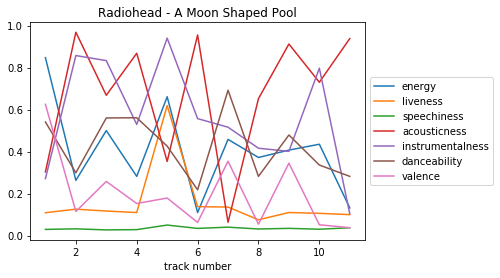

In [13]:
#Radiohead - A Moon Shaped Pool
trackNumber = []
trackEnergy = []
trackLiveness = []
trackTempo = []
trackSpeechiness = []
trackAcousticness = []
trackInstrumentalness = []
trackDanceability = []
trackLoudness = []
trackValence = []
for track in aMoonShapedPoolAlbumTracks['items']:
    #print (json.dumps(track, indent=2))
    #print track['id']
    audioFeature = sp.audio_features(tracks=[track['id']])
    trackNumber.append(track['track_number'])
    trackEnergy.append(audioFeature[0]['energy'])
    trackLiveness.append(audioFeature[0]['liveness'])
    trackTempo.append(audioFeature[0]['tempo'])
    trackSpeechiness.append(audioFeature[0]['speechiness'])
    trackAcousticness.append(audioFeature[0]['acousticness'])
    trackInstrumentalness.append(audioFeature[0]['instrumentalness'])
    trackDanceability.append(audioFeature[0]['danceability'])
    trackLoudness.append(audioFeature[0]['loudness'])
    trackValence.append(audioFeature[0]['valence'])
    #print x,y
print trackNumber
print trackValence

plt.plot(trackNumber, trackEnergy, label='energy')
plt.plot(trackNumber, trackLiveness, label='liveness')
#plt.plot(trackNumber, trackTempo, label='tempo')
plt.plot(trackNumber, trackSpeechiness, label='speechiness')
plt.plot(trackNumber, trackAcousticness, label='acousticness')
plt.plot(trackNumber, trackInstrumentalness, label='instrumentalness')
plt.plot(trackNumber, trackDanceability, label='danceability')
#plt.plot(trackNumber, trackLoudness, label='loudness')
plt.plot(trackNumber, trackValence, label='valence')
plt.xlabel('track number')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Radiohead - A Moon Shaped Pool')


In [83]:
# dict with albumId as key and albumTracks as value
albumIdTracks = dict()
for albumId in albumIdName.keys():
    albumIdTracks[albumId] = sp.album_tracks(albumId)
print albumIdTracks

{u'19RUXBFyM4PpmrLRdtqWbp': {u'items': [{u'name': u'Everything In Its Right Place', u'external_urls': {u'spotify': u'https://open.spotify.com/track/5AiNZnMDCWwujIENPj9PV9'}, u'uri': u'spotify:track:5AiNZnMDCWwujIENPj9PV9', u'explicit': False, u'preview_url': u'https://p.scdn.co/mp3-preview/54f1a88d16e6a4be7f82fccc62f8047652686b16?cid=b4824c9f076d4840882936ac20120dce', u'track_number': 1, u'disc_number': 1, u'href': u'https://api.spotify.com/v1/tracks/5AiNZnMDCWwujIENPj9PV9', u'artists': [{u'name': u'Radiohead', u'external_urls': {u'spotify': u'https://open.spotify.com/artist/4Z8W4fKeB5YxbusRsdQVPb'}, u'uri': u'spotify:artist:4Z8W4fKeB5YxbusRsdQVPb', u'href': u'https://api.spotify.com/v1/artists/4Z8W4fKeB5YxbusRsdQVPb', u'type': u'artist', u'id': u'4Z8W4fKeB5YxbusRsdQVPb'}], u'duration_ms': 251426, u'type': u'track', u'id': u'5AiNZnMDCWwujIENPj9PV9', u'available_markets': [u'AD', u'AR', u'AT', u'AU', u'BE', u'BG', u'BO', u'BR', u'CA', u'CH', u'CL', u'CO', u'CR', u'CY', u'CZ', u'DE', u'D

In [97]:
# compare all features independently  -> normalize album tracks (length of album)
# viz graphs & calculate correlation

albumTrackIds = dict()
albumTrackNumber = dict()
albumTrackNames = dict()
albumTrackValence = dict()

for a in albumIdTracks.items(): #a[0]: id, a[1]: tracks
    #print a[0] #id
    trackIds = []
    trackNumber = []
    trackNames = []
    trackValence = []
    for track in a[1]['items']:
        audioFeature = sp.audio_features(tracks=[track['id']])
        trackIds.append(track['id'])
        trackNumber.append(track['track_number'])
        trackNames.append(track['name'])
        trackValence.append(audioFeature[0]['valence'])
    albumTrackIds[a[0]] = trackIds
    albumTrackNumber[a[0]] = trackNumber
    albumTrackNames[a[0]] = trackNames
    albumTrackValence[a[0]] = trackValence
    #print trackNumber
    #print trackValence

#print (json.dumps(albumTrackNumber, indent=2))
#print (json.dumps(albumTrackNames, indent=2))
#print (json.dumps(albumTrackValence, indent=2))



In [99]:
for album in albumIdName.items():
    print(album[0] + ': ' + album[1])
    #print(albumTrackIds[album[0]])
    print(albumTrackNumber[album[0]])
    #print(albumTrackNames[album[0]])
    print(albumTrackValence[album[0]])

500FEaUzn8lN9zWFyZG5C2: The Bends
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[0.272, 0.315, 0.36, 0.127, 0.431, 0.382, 0.372, 0.643, 0.0781, 0.28, 0.618, 0.133]
1oW3v5Har9mvXnGk0x4fHm: Hail To the Thief
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0.365, 0.528, 0.0458, 0.724, 0.654, 0.473, 0.0378, 0.115, 0.726, 0.17, 0.551, 0.56, 0.231, 0.363]
7dxKtc08dYeRVHt3p9CZJn: OK Computer
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[0.642, 0.202, 0.337, 0.183, 0.131, 0.311, 0.728, 0.328, 0.211, 0.126, 0.195, 0.04]
6svTt5o2lUgIrgYDKVmdnD: I Might Be Wrong
[1, 2, 3, 4, 5, 6, 7, 8]
[0.287, 0.332, 0.342, 0.105, 0.298, 0.196, 0.226, 0.061]
1DBkJIEoeHrTX4WCBQGcCi: The King Of Limbs
[1, 2, 3, 4, 5, 6, 7, 8]
[0.325, 0.407, 0.602, 0.751, 0.603, 0.0629, 0.157, 0.666]
6vuykQgDLUCiZ7YggIpLM9: A Moon Shaped Pool
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.625, 0.115, 0.258, 0.153, 0.179, 0.0629, 0.354, 0.0545, 0.345, 0.0517, 0.0378]
19RUXBFyM4PpmrLRdtqWbp: Kid A
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.0585, 0.159, 0.

In [86]:
#normalize number of tracks
albumTrackNumberNormalized = dict()
for albumTracks in albumTrackNumber.items():
    albumTrackNumberNormalized[albumTracks[0]] = [float(i)/len(albumTracks[1]) for i in albumTracks[1]]
print albumTrackNumberNormalized

{u'19RUXBFyM4PpmrLRdtqWbp': [0.09090909090909091, 0.18181818181818182, 0.2727272727272727, 0.36363636363636365, 0.45454545454545453, 0.5454545454545454, 0.6363636363636364, 0.7272727272727273, 0.8181818181818182, 0.9090909090909091, 1.0], u'1oW3v5Har9mvXnGk0x4fHm': [0.07142857142857142, 0.14285714285714285, 0.21428571428571427, 0.2857142857142857, 0.35714285714285715, 0.42857142857142855, 0.5, 0.5714285714285714, 0.6428571428571429, 0.7142857142857143, 0.7857142857142857, 0.8571428571428571, 0.9285714285714286, 1.0], u'7dxKtc08dYeRVHt3p9CZJn': [0.08333333333333333, 0.16666666666666666, 0.25, 0.3333333333333333, 0.4166666666666667, 0.5, 0.5833333333333334, 0.6666666666666666, 0.75, 0.8333333333333334, 0.9166666666666666, 1.0], u'6svTt5o2lUgIrgYDKVmdnD': [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0], u'1DBkJIEoeHrTX4WCBQGcCi': [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0], u'6vuykQgDLUCiZ7YggIpLM9': [0.09090909090909091, 0.18181818181818182, 0.2727272727272727, 0.36363636363636

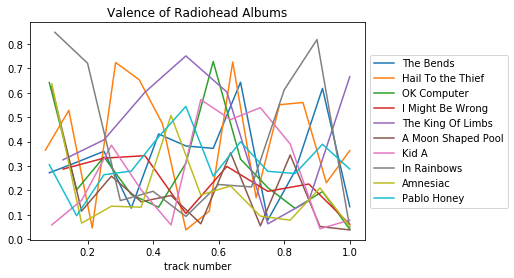

In [87]:
for album in albumIdName.items():
    #album[0]
    #albumTrackNumber or albumTrackNumberNormalized
    plt.plot(albumTrackNumberNormalized[album[0]], albumTrackValence[album[0]], label=album[1])
    plt.xlabel('track number')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Valence of Radiohead Albums')
plt.show()

In [105]:
#Combine OK Computer and In Rainbows
# OK Computer: 7dxKtc08dYeRVHt3p9CZJn
# In Rainbows: 7eyQXxuf2nGj9d2367Gi5f

trackNumbers0110 = []
trackValence0110 = []

id01 = '7dxKtc08dYeRVHt3p9CZJn' # OK Computer
id10 = '7eyQXxuf2nGj9d2367Gi5f' # In Rainbows

ids0110 = [id01, id10]

#for id in ids0110:
    #print id
    #print albumIdName[id]
    #print (albumTrackNames[id])
    #print (albumTrackIds[id])
#OK Computer
#[u'Airbag', u'Paranoid Android', u'Subterranean Homesick Alien', u'Exit Music (For a Film)', u'Let Down', u'Karma Police', u'Fitter Happier', u'Electioneering', u'Climbing Up the Walls', u'No Surprises', u'Lucky', u'The Tourist']
#[u'3OsUjkcv1C1v5udFhgRSFg', u'2nTsKOXIVGDf2iPeVQO2Gm', u'19yGmm9FjEZdZc5j98WDe4', u'4Na0siMtWOW9pJoWJ1Ponv', u'4aOAzvRdOsZSwZIgwcdeL0', u'3SVAN3BRByDmHOhKyIDxfC', u'53aFGAl0Vebwp2bo8wtdWR', u'6PBHfI3G8MlQ8qdItoVoxL', u'0R332cdlS9LyE0Ge2PSlVC', u'1bSpwPhAxZwlR2enJJsv7U', u'6n7GUf2h8D2Ad2wUy5s7nE', u'75YUnz58ajMo2VIIuUFvOV']
#In Rainbows
#[u'15 Step', u'Bodysnatchers', u'Nude', u'Weird Fishes/ Arpeggi', u'All I Need', u'Faust Arp', u'Reckoner', u'House Of Cards', u'Jigsaw Falling Into Place', u'Videotape']
#[u'6dsq7Nt5mIFzvm5kIYNORy', u'4m0Vgr48VFaMYw0Sp1ozJu', u'5k7VKj1Xwy5DjO4B0PdAOb', u'4Iyo50UoYhuuYORMLrGDci', u'51ygW389BW4Dut3B69pSwc', u'5SdmtFbNOD7Qej6jFCHkOM', u'56Z7hbyMrndw1naxb6I5Oi', u'3Jc6X15OZCCyhGSHBF4hwB', u'15ea10YpJIl3mJq75yzqsD', u'3uxhyRdWVXp7GQvERQl6fA']

trackIds0110 = ['3OsUjkcv1C1v5udFhgRSFg', #Airbag
                '6dsq7Nt5mIFzvm5kIYNORy', #15 Step
                '2nTsKOXIVGDf2iPeVQO2Gm', #Paranoid Android
                '4m0Vgr48VFaMYw0Sp1ozJu', #Bodysnatchers
                '19yGmm9FjEZdZc5j98WDe4', #Subterranean Homesick Alien
                '5k7VKj1Xwy5DjO4B0PdAOb', #Nude
                '4Na0siMtWOW9pJoWJ1Ponv', #Exit Music (For a Film)
                '4Iyo50UoYhuuYORMLrGDci', #Weird Fishes/ Arpeggi
                '4aOAzvRdOsZSwZIgwcdeL0', #Let Down
                '51ygW389BW4Dut3B69pSwc', #All I Need'
                '3SVAN3BRByDmHOhKyIDxfC', #Karma Police
                '53aFGAl0Vebwp2bo8wtdWR', #Fitter Happier
                '5SdmtFbNOD7Qej6jFCHkOM', #Faust Arp
                '6PBHfI3G8MlQ8qdItoVoxL', #Electioneering
                '56Z7hbyMrndw1naxb6I5Oi', #Reckoner
                '0R332cdlS9LyE0Ge2PSlVC', #Climbing Up the Walls
                '3Jc6X15OZCCyhGSHBF4hwB', #House Of Cards
                '1bSpwPhAxZwlR2enJJsv7U', #No Surprises
                '15ea10YpJIl3mJq75yzqsD', #Jigsaw Falling Into Place
                '6n7GUf2h8D2Ad2wUy5s7nE', #Lucky
                '3uxhyRdWVXp7GQvERQl6fA', #Videotape
                '75YUnz58ajMo2VIIuUFvOV'  #The Tourist
               ]

#    albumTrackNames
#albumTrackValence


In [130]:
#print trackIds0110
tracks0110 = sp.tracks(trackIds0110)
#print(json.dumps(tracks0110, indent=2))

In [138]:
trackNames0110 = []
for track in tracks0110['tracks']:
    trackNames0110.append(track['name'])
print trackNames0110

{u'album': {u'album_type': u'album', u'name': u'OK Computer', u'external_urls': {u'spotify': u'https://open.spotify.com/album/7dxKtc08dYeRVHt3p9CZJn'}, u'uri': u'spotify:album:7dxKtc08dYeRVHt3p9CZJn', u'href': u'https://api.spotify.com/v1/albums/7dxKtc08dYeRVHt3p9CZJn', u'artists': [{u'name': u'Radiohead', u'external_urls': {u'spotify': u'https://open.spotify.com/artist/4Z8W4fKeB5YxbusRsdQVPb'}, u'uri': u'spotify:artist:4Z8W4fKeB5YxbusRsdQVPb', u'href': u'https://api.spotify.com/v1/artists/4Z8W4fKeB5YxbusRsdQVPb', u'type': u'artist', u'id': u'4Z8W4fKeB5YxbusRsdQVPb'}], u'images': [{u'url': u'https://i.scdn.co/image/f89c1ecdd0cc5a23d5ad7303d4ae231d197dde98', u'width': 640, u'height': 640}, {u'url': u'https://i.scdn.co/image/1b898f0b8e3ce499d0fc629a1918c144d982e475', u'width': 300, u'height': 300}, {u'url': u'https://i.scdn.co/image/faf295a70a6531826a8c25d33aad7d2cd9c75c7a', u'width': 64, u'height': 64}], u'type': u'album', u'id': u'7dxKtc08dYeRVHt3p9CZJn', u'available_markets': [u'AD', 

In [132]:
audioFeatures0110 = sp.audio_features(tracks=trackIds0110)
print(json.dumps(audioFeatures0110, indent=2))

[
  {
    "track_href": "https://api.spotify.com/v1/tracks/3OsUjkcv1C1v5udFhgRSFg", 
    "analysis_url": "https://api.spotify.com/v1/audio-analysis/3OsUjkcv1C1v5udFhgRSFg", 
    "energy": 0.872, 
    "liveness": 0.261, 
    "tempo": 167.946, 
    "speechiness": 0.05, 
    "uri": "spotify:track:3OsUjkcv1C1v5udFhgRSFg", 
    "acousticness": 0.00792, 
    "instrumentalness": 0.8, 
    "time_signature": 4, 
    "danceability": 0.306, 
    "key": 2, 
    "duration_ms": 287880, 
    "loudness": -7.313, 
    "valence": 0.642, 
    "type": "audio_features", 
    "id": "3OsUjkcv1C1v5udFhgRSFg", 
    "mode": 1
  }, 
  {
    "track_href": "https://api.spotify.com/v1/tracks/6dsq7Nt5mIFzvm5kIYNORy", 
    "analysis_url": "https://api.spotify.com/v1/audio-analysis/6dsq7Nt5mIFzvm5kIYNORy", 
    "energy": 0.853, 
    "liveness": 0.0934, 
    "tempo": 94.457, 
    "speechiness": 0.0423, 
    "uri": "spotify:track:6dsq7Nt5mIFzvm5kIYNORy", 
    "acousticness": 0.0489, 
    "instrumentalness": 0.346, 
    

In [135]:
trackNumber0110 = []
trackValence0110 = []
tn = 1
for af in audioFeatures0110:
    trackNumber0110.append(tn)
    trackValence0110.append(af['valence'])
    tn+=1
print trackNumber0110
print trackValence0110

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
[0.642, 0.848, 0.202, 0.721, 0.337, 0.158, 0.183, 0.196, 0.131, 0.0931, 0.311, 0.728, 0.224, 0.328, 0.214, 0.211, 0.612, 0.126, 0.818, 0.195, 0.0468, 0.04]


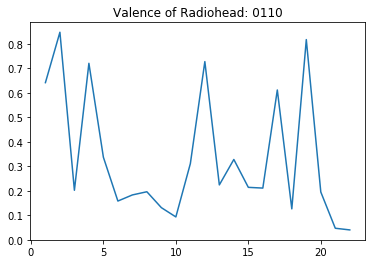

In [137]:
plt.plot(trackNumber0110, trackValence0110)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Valence of Radiohead: 0110')
plt.show()

In [142]:
#for trackId in trackIds0110:
aa = sp.audio_analysis('3OsUjkcv1C1v5udFhgRSFg')['beats']
print aa


[{u'duration': 0.38747, u'start': 1.102, u'confidence': 0.854}, {u'duration': 0.36885, u'start': 1.48947, u'confidence': 0.115}, {u'duration': 0.37793, u'start': 1.85833, u'confidence': 0.1}, {u'duration': 0.38174, u'start': 2.23625, u'confidence': 0.107}, {u'duration': 0.37755, u'start': 2.618, u'confidence': 0.076}, {u'duration': 0.37847, u'start': 2.99554, u'confidence': 0.093}, {u'duration': 0.37812, u'start': 3.37401, u'confidence': 0.133}, {u'duration': 0.37909, u'start': 3.75213, u'confidence': 0.09}, {u'duration': 0.37974, u'start': 4.13123, u'confidence': 0.111}, {u'duration': 0.37655, u'start': 4.51097, u'confidence': 0.099}, {u'duration': 0.3711, u'start': 4.88751, u'confidence': 0.095}, {u'duration': 0.37526, u'start': 5.25861, u'confidence': 0.082}, {u'duration': 0.37879, u'start': 5.63387, u'confidence': 0.087}, {u'duration': 0.38391, u'start': 6.01266, u'confidence': 0.108}, {u'duration': 0.38199, u'start': 6.39657, u'confidence': 0.132}, {u'duration': 0.3743, u'start': 